**Install All the Ultralytics Package**

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
! pip install ultralytics
! pip install opencv-python

**Import All the Required Libraries**

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Download the Dataset from Roboflow**

In [ ]:
! pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="z1uD0b9XOZdnivUdFkEd")
project = rf.workspace("project-uyrxf").project("potholes-detection-segmentation")
version = project.version(1)
dataset = version.download("yolov11")

In [ ]:
dataset.location

**Train the YOLO11 Segmentation Model on a Custom Dataset**

In [ ]:
# Load the YOLO11-Seg Model
model = YOLO("yolo11s-seg.pt")

**Please make sure to update the train and validation dataset images path before starting training**

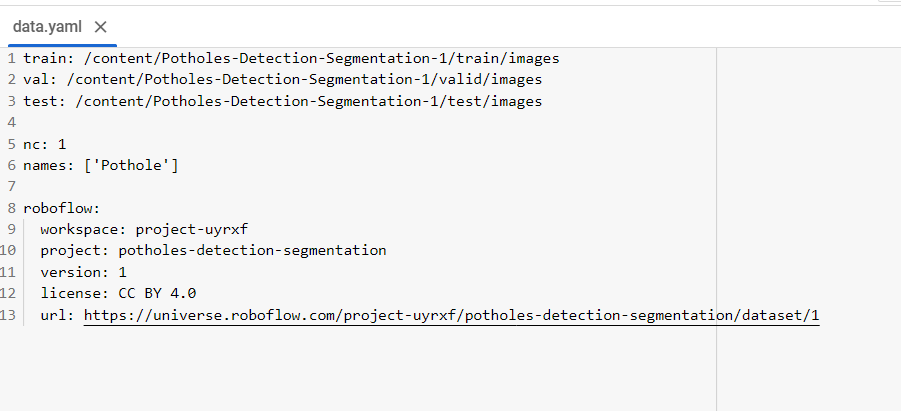

In [ ]:
! cat Potholes-Detection-Segmentation-1/data.yaml

In [ ]:
# Train the Model on a Custom Dataset
results = model.train(task = 'segment',
                      mode = 'train',
                      data = "/content/Potholes-Detection-Segmentation-1/data.yaml",
                      epochs = 50)

**Download the Best Model Weights**

In [ ]:
! gdown "https://drive.google.com/uc?id=1DnQ3jNXUn4SxMjW5KtHGfzjNHY79VjR3&confirm=t"

**Examining Results**

**Box and Mask Curves of Precision-Confidence and Recall - Confidence**

In [ ]:
train_path = "/content/runs/segment/train"

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load your images using OpenCV
img1 = cv2.imread(f"{train_path}/BoxP_curve.png")
img2 = cv2.imread(f"{train_path}/BoxR_curve.png")
img3 = cv2.imread(f"{train_path}/MaskP_curve.png")
img4 = cv2.imread(f"{train_path}/MaskR_curve.png")

# Concatenate the images horizontally
top_row = cv2.hconcat([img1, img2])
botton_row = cv2.hconcat([img3, img4])

# Concatenate the two rows vertically
grid = cv2.vconcat([top_row, botton_row])

# Display the concatenated images
cv2_imshow(grid)


**Confusion Matrix**

In [ ]:
Image("/content/runs/segment/train/confusion_matrix.png", width = 800)

**Normalized Confusion Matrix**

In [ ]:
Image("/content/runs/segment/train/confusion_matrix_normalized.png", width = 800)

**Model Prediction on Validation Batch**

In [ ]:
Image("/content/runs/segment/train/val_batch0_pred.jpg", width = 800)

In [ ]:
Image("/content/runs/segment/train/val_batch1_pred.jpg", width = 800)

In [ ]:
Image("/content/runs/segment/train/results.png", width = 800)

**Validate Fine-Tuned Model**

In [ ]:
metrics = model.val()
# Print the evaluation metrics
print("Model Evaluation Metrics:", metrics)

**Inference on Test Dataset Images**

In [ ]:
# Predict on Test Images using Trained Model
import os

# Load Trained Model
model = YOLO("/content/best.pt") # Change to mine?

# Specify the test folder path
test_path = "/content/Potholes-Detection-Segmentation-1/test/images"

# List all images in the test folder
image_files = [os.path.join(test_path, f) for f in os.listdir(test_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Predict each images
for img_path in image_files:
  results = model.predict(source = img_path, save = True, conf = 0.20)

**Plot Prediction on Test Images**

In [ ]:
# Plot prediction on test images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Specify the predict folder path
pred_path = '/content/runs/segment/predict'

# List all images in the predict folder
pred_image_files = [os.path.join(pred_path, img) for img in os.listdir(pred_path) if img.endswith(('.jpg', '.jpeg', '.png'))]

# Number of images per row
images_per_row = 5

# Calculate the number of rows needed
n_rows = len(pred_image_files) // images_per_row + int(len(pred_image_files) % images_per_row != 0)

# Set figure size
fig, axs = plt.subplots(n_rows, images_per_row, figsize=(15, 3 * n_rows))

# Flatten axes if necessary (for easier iteration)
axs = axs.flatten()

# Loop through each image and display it
for i, img_path in enumerate(pred_image_files):
    img = mpimg.imread(img_path)      # Read the image
    axs[i].imshow(img)                # Show the image
    axs[i].axis('off')                # Turn off axis
    axs[i].set_title(f"Image {i+1}")  # Add title

# Hide any extra empty subplots (if the number of images is not a perfect multiple of images_per_row)
for j in range(i+1, len(axs)):
    axs[j].axis('off')  # Hide unused axes

# Display all images
plt.tight_layout()
plt.show()

**Inference on a Sample Video**

In [ ]:
! gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

In [ ]:
results = model.predict(source = "/content/demo.mp4", save = True, conf = 0.25, iou = 0.3)

In [ ]:
! rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/demo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
! gdown "https://drive.google.com/uc?id=1_-JPW9TEWG_eyzWmT-jlfB2O5tzEiauW&confirm=t"

In [ ]:
results = model.predict(source = "/content/video2.mp4", save = True, conf = 0.25, iou = 0.3)

In [ ]:
! rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/video2.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)